In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import sidewalk_qualifer
from extract_direct_indicators import *

In [3]:
dir_ind = extract_direct_indicators(sidewalk_qualifer, 'sea')
dir_ind

,id,nversions,nusers,nedits,ntags,dir_confirmations,nrollbacks,visibility,tags,type
0,7978359,7,6,9,0,1,0,D,{},W
1,7978480,8,5,10,9,3,0,V,"{'footway': 'sidewalk', 'highway': 'footway', ...",W
2,9118414,10,8,17,11,5,0,V,"{'foot': 'yes', 'footway': 'sidewalk', 'highwa...",W
3,13365835,11,7,6,4,3,0,V,"{'footway': 'sidewalk', 'highway': 'footway', ...",W
4,13525213,6,6,6,3,1,0,V,"{'footway': 'sidewalk', 'highway': 'footway', ...",W
...,...,...,...,...,...,...,...,...,...,...
18735,1084374291,1,1,0,3,0,0,V,"{'footway': 'sidewalk', 'highway': 'footway', ...",W
18736,1084465428,1,1,0,2,0,0,V,"{'footway': 'sidewalk', 'highway': 'footway'}",W
18737,1084465431,1,1,0,2,0,0,V,"{'footway': 'sidewalk', 'highway': 'footway'}",W
18738,1084465432,1,1,0,2,0,0,V,"{'footway': 'sidewalk', 'highway': 'footway'}",W


In [4]:
stats = get_stats(dir_ind)
stats

,nversions,nusers,nedits,ntags,dir_confirmations,nrollbacks
mean,1.720277,1.453949,0.504055,2.71286,0.222839,0.005123
25%,1.000000,1.000000,0.000000,2.00000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,2.00000,0.000000,0.000000


In [ ]:
# To measure trustworthiness of sidewalk data: dir/indir indicators of the *road* that is associated with that sidewalk!

# Two steps:

# Check if sidewalk-data availabile or not. Four cases:
    # i) Partial availability (Case 1): sidewalk geometry available but tag is not available on the associated road
    # ii) Partial availability (Case 2): sidewalk geometry not availble, but sidewalk tag (yes/ left/ right/ both) is on the road
    # iii) Full availibility: Both sidewalk geometry and sidewalk tag on the associated road are available. Or, if sidewalk is not there then tag is (no/none)
    # iv) Unavailable: Neither geometry nor the tag of associated road is available

# if available, check if the associated road data is trustworthy or not

# Indirect and time indicator measurable
# But direct indicator not so as sidewalk data only started to increase in recent times and barely have 2 tags only

# In future: surface material, widths, etc features should be integral part of sidewalks

### Plot Sidewalk Attribute Tag Percentage
(Note: move to separate notebook)

In [82]:
# Calculate attribute dists in 5 cities:
def compute_sidewalk(city, res):
    att = ['surface', 'smoothness', 'width', 'bicycle', 'incline', 'kerb', 'wheelchair', 'tactile_paving']
    dir_ind = extract_direct_indicators(sidewalk_qualifer, city)

    mp = defaultdict(lambda: 0)

    
    for tag in dir_ind['tags'].tolist():
        for key in tag:
            if(key in att):
                mp[key] += 1

    res = []
    for key in att:
        res.append([city, key, (mp[key]/len(dir_ind) * 100)])

cities = ['chi', 'sea', 'nyc', 'det', 'jvi']
res = []

for city in cities:
    compute_sidewalk(city, res)

city_res = pd.DataFrame(res, columns = ['city', 'attribute', 'percentage'])

In [27]:
city_res

,no. of sidewalks,surface,smoothness,width,bicycle,incline,kerb,wheelchair,tactile_paving,city
0,18821,6.402423,0.021253,0.042506,1.301737,0.021253,0.005313,0.042506,0.961692,chi
1,18740,40.261473,0.421558,0.336179,1.254002,4.076841,0.069370,3.569904,3.756670,sea
2,53326,25.839178,0.075010,0.099389,4.673143,0.043131,0.001875,0.054382,0.161272,nyc
3,37577,4.691700,0.111770,0.018628,1.647284,0.053224,0.082497,0.087820,0.239508,det
4,29785,2.813497,0.000000,0.859493,0.258519,0.003357,0.000000,0.000000,0.063790,jvi


Text(0, 0.5, 'Percentage')

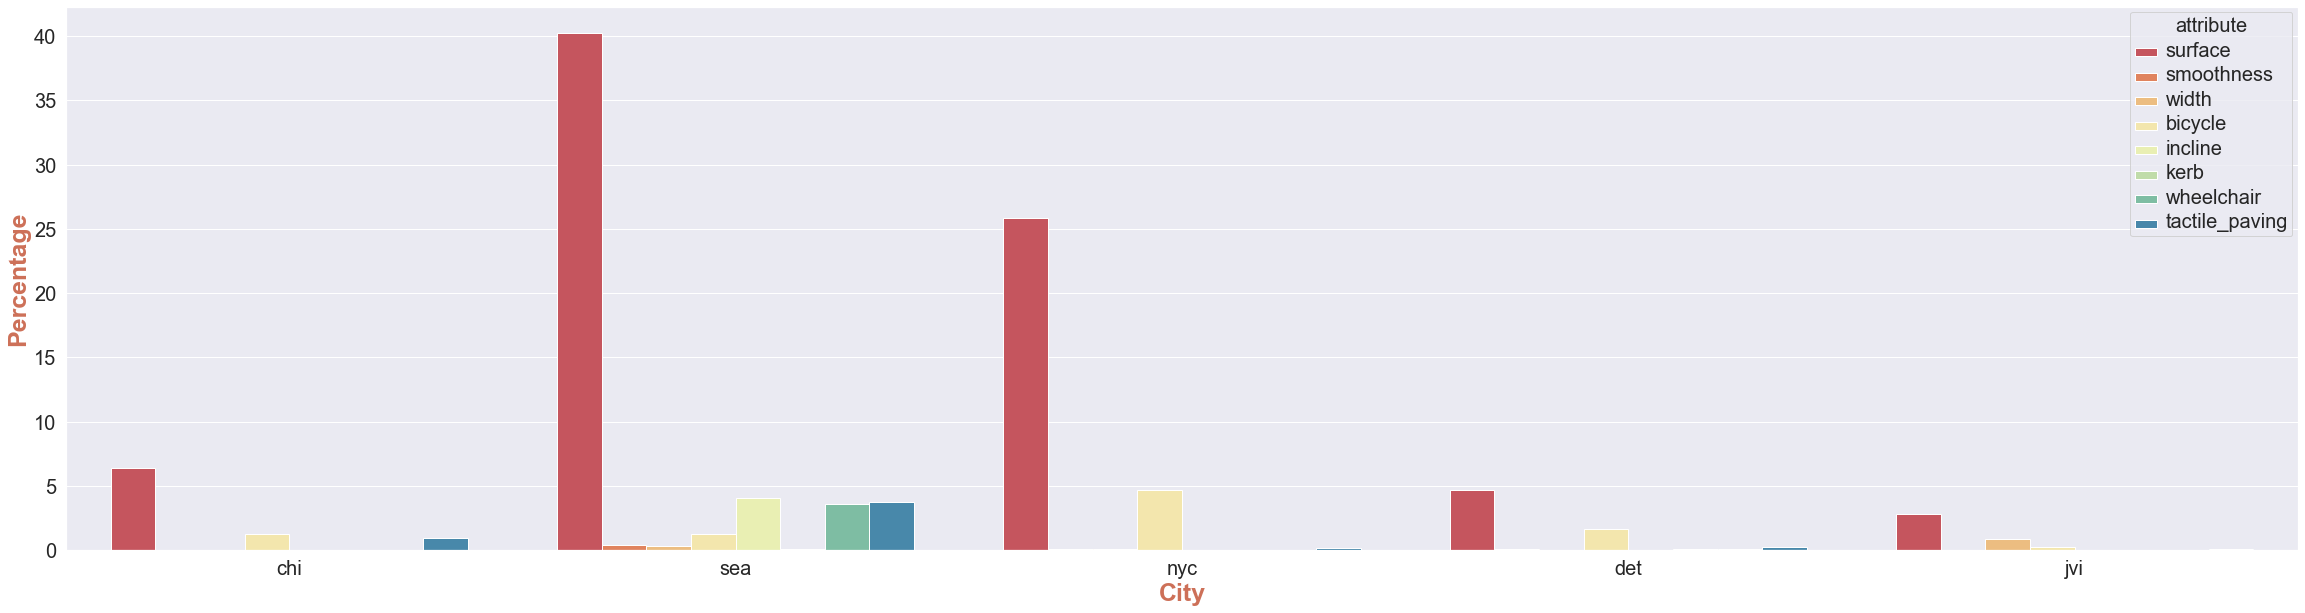

In [80]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")
sns.color_palette("icefire", as_cmap=True)

# Set the figure size
plt.figure(figsize=(40, 10))
plt.xticks(fontsize='20')
plt.yticks(fontsize='20') 

# grouped barplot
ax = sns.barplot(x="city", y="percentage", hue="attribute", data=city_res, palette="Spectral")

# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
 
# for legend title
plt.setp(ax.get_legend().get_title(), fontsize='20')

plt.xlabel('City', fontweight='bold', color = '#cd7058', fontsize='25')
plt.ylabel('Percentage', fontweight='bold', color = '#cd7058', fontsize='25')

In [83]:
city_res.head(10)

,city,attribute,percentage
0,chi,surface,6.402423
1,chi,smoothness,0.021253
2,chi,width,0.042506
3,chi,bicycle,1.301737
4,chi,incline,0.021253
5,chi,kerb,0.005313
6,chi,wheelchair,0.042506
7,chi,tactile_paving,0.961692
8,sea,surface,40.261473
9,sea,smoothness,0.421558
